# Signal processing

In this part, you will generate and visualize three sine waves of different frequencies and observe their combined signal.

(0.0, 0.2)

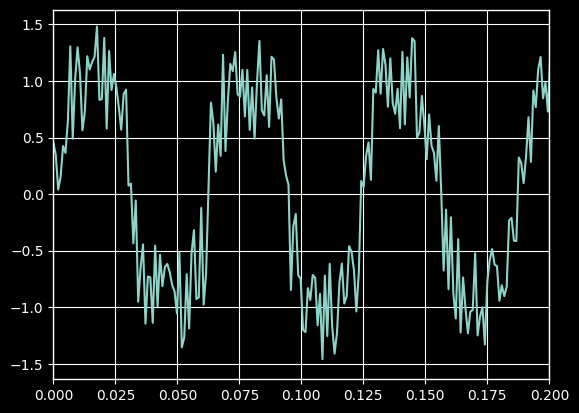

In [109]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("https://websites.umich.edu/~mejn/cp/data/pitch.txt")  # Combine the three sine waves

time = np.linspace(0, 1, len(data)) # assume data is a one-second sample

plt.plot(time, data)
plt.xlim(0, 0.2)



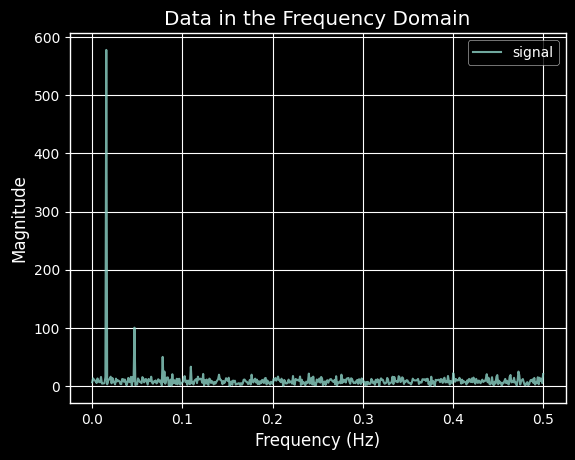

In [110]:
data_freq = np.fft.rfft(data)  # Multiply the window with the signal
frequencies = np.fft.rfftfreq(len(data))  # Adjust with the sampling frequency


plt.plot(frequencies, np.abs(data_freq), label='signal', alpha=0.8)  # Fill in correct variables

# Formatting
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title("Data in the Frequency Domain")
plt.legend()
plt.show()


Text(0, 0.5, 'Counts')

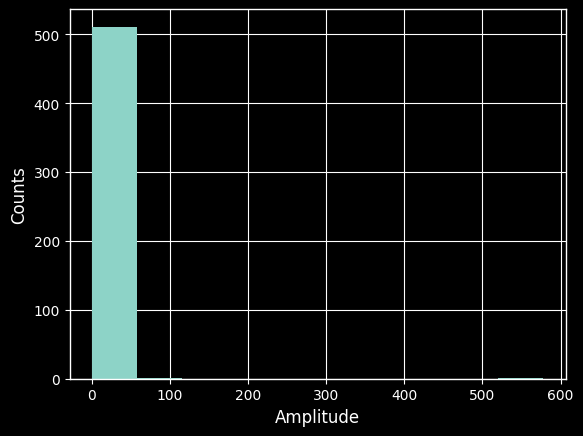

In [111]:
plt.hist(np.abs(data_freq))
plt.xlabel("Amplitude")
plt.ylabel("Counts")

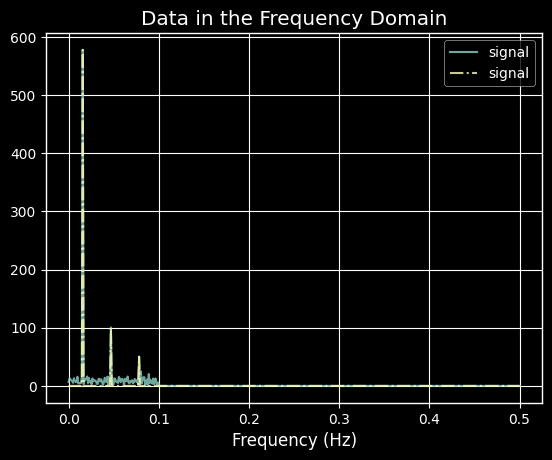

In [112]:
import numpy as np
import matplotlib.pyplot as plt

# Apply thresholding
threshold_freq = 0.1  # Set an appropriate threshold value
threshold_amp = 50
data_freq_filtered = np.where(frequencies < threshold_freq, data_freq, 0) #use np.where; Only retain data beyond the threshold
data_amp_filtered= np.where(abs(data_freq) > threshold_amp, data_freq, 0)

plt.plot(frequencies, np.abs(data_freq_filtered), label='signal', alpha=0.8)  # Fill in correct variables
plt.plot(frequencies, np.abs(data_amp_filtered), label='signal', alpha=0.8, ls = '-.')

plt.xlabel('Frequency (Hz)')
plt.title("Data in the Frequency Domain")
plt.legend()
plt.show()

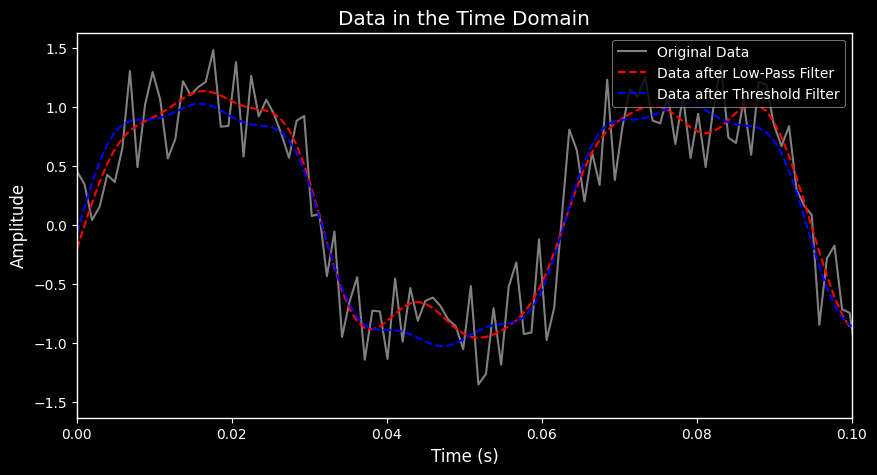

In [113]:
# Apply Inverse Fourier Transform
freq_after_ifft = np.fft.irfft(data_freq_filtered)  # Use the filtered frequency data
amp_after_ifft = np.fft.irfft(data_amp_filtered)

plt.style.use('dark_background')
# Plot the original and reconstructed signals
plt.figure(figsize=(10, 5))
plt.plot(time, data, label='Original Data', color='gray')  # Fill in correct variables
plt.plot(time, freq_after_ifft, '--', label='Data after Low-Pass Filter', color='r')
plt.plot(time, amp_after_ifft, '--', label='Data after Threshold Filter', color='b')

plt.xlim(0, 0.1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Data in the Time Domain')
plt.legend(loc='upper right')
plt.grid(False)

plt.show()
